In [76]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock
import random
import seaborn as sns

In [2]:
df = pd.read_csv('data_ecom.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#summary 
len(df['InvoiceNo'].unique()), len(df['StockCode'].unique())

(25900, 4070)

In [5]:
# Stripping extra spaces in the description
df['Description'] = df['Description'].str.strip()
  
# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
  
# Dropping all transactions which were done on credit
df = df[~df['InvoiceNo'].str.contains('C')]

In [7]:
#prepare basket for apriori
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [8]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#hot encode
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [10]:
# get frequent items on support
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.050995,(ALARM CLOCK BAKELIKE RED)
1,0.070597,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.058273,(HEART OF WICKER SMALL)
3,0.056380,(JAM MAKING SET PRINTED)
4,0.054973,(JAM MAKING SET WITH JARS)
5,0.059098,(JUMBO BAG PINK POLKADOT)
6,0.101504,(JUMBO BAG RED RETROSPOT)
7,0.057011,(JUMBO SHOPPER VINTAGE RED PAISLEY)
8,0.057448,(JUMBO STORAGE BAG SUKI)
9,0.061766,(LUNCH BAG BLACK SKULL.)


In [12]:
# General rules -> no relations
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [13]:
# Basket for France
basket_France = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [14]:
basket_France = basket_France.applymap(encode_units)

In [18]:
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(20712),(POST),0.076531,0.765306,0.076531,1.000,1.306667,0.017961,inf
240,"(22554, 21731)",(POST),0.053571,0.765306,0.053571,1.000,1.306667,0.012573,inf
246,"(21731, 22556)",(POST),0.051020,0.765306,0.051020,1.000,1.306667,0.011974,inf
209,"(21080, 21086)",(21094),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959
208,"(21080, 21094)",(21086),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796


Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.

Confidence is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

Lift is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [17]:
filter_rules = rules.loc[(rules['confidence']>0.5) & (rules['lift']>1.0)]
filter_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(20712),(POST),0.076531,0.765306,0.076531,1.000,1.306667,0.017961,inf
240,"(22554, 21731)",(POST),0.053571,0.765306,0.053571,1.000,1.306667,0.012573,inf
246,"(21731, 22556)",(POST),0.051020,0.765306,0.051020,1.000,1.306667,0.011974,inf
209,"(21080, 21086)",(21094),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959
208,"(21080, 21094)",(21086),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796


In [19]:
#France WH
coordinates = [[x,y] for x in range(40) for y in range(40)]
coordinates2 = [[x,y] for x in range(40) for y in range(40)]
x = [p[0] for p in coordinates]
y = [p[1] for p in coordinates]

In [20]:
# not used
distance0 = []
def manhattan(coord):
    for i in range(len(coord)):
        distance0.append(cityblock([0,0],[coord[i][0],coord[i][1]]))
manhattan(coordinates)

In [22]:
# not used
dic = {'x':x, 'y':y,'coordinates':coordinates, 'distance0':distance0}

In [23]:
wh = pd.DataFrame(dic).sort_values('distance0')
wh['rank'] = wh['distance0'].rank(method='first')
wh.reset_index(inplace=True, drop=True)
wh.head()

,x,y,coordinates,distance0,rank
0,0,0,"[0, 0]",0,1.0
1,0,1,"[0, 1]",1,2.0
2,1,0,"[1, 0]",1,3.0
3,0,2,"[0, 2]",2,4.0
4,2,0,"[2, 0]",2,5.0


In [26]:
# filter products France
products_fr = df[df['Country'] =="France"]
products_fr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [27]:
# French stock codes with support + rank
products = products_fr.groupby('StockCode').agg({'Quantity':'count'}).reset_index().sort_values('Quantity', ascending=False)
products['Support'] = products['Quantity']/sum(products['Quantity'])
products['Rank'] = products['Support'].rank(method='first',ascending=False)
products.reset_index(inplace=True, drop=True)
products.head()

,StockCode,Quantity,Support,Rank
0,POST,300,0.035680,1.0
1,23084,74,0.008801,2.0
2,21731,71,0.008444,3.0
3,22554,68,0.008088,4.0
4,22556,66,0.007850,5.0


In [30]:
# Randomly shuffel locations and adding random + location based on support
random.shuffle(coordinates2)
products['RandomLoc'] = coordinates2[0:int(len(products['StockCode']))]
products['SupportLoc'] = wh['coordinates'][0:int(len(products['StockCode']))+1]
filter_rules.reset_index(inplace=True, drop=True)

In [31]:
products.head()

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc
0,POST,300,0.035680,1.0,"[18, 32]","[0, 0]"
1,23084,74,0.008801,2.0,"[30, 24]","[0, 1]"
2,21731,71,0.008444,3.0,"[15, 39]","[1, 0]"
3,22554,68,0.008088,4.0,"[39, 0]","[0, 2]"
4,22556,66,0.007850,5.0,"[38, 34]","[2, 0]"


In [32]:
# Combine lists of pairs
ls_ant = []
for i in filter_rules['antecedents']:
    ls_ant.append(list(i))
    
ls_con = []
for i in filter_rules['consequents']:
    ls_con.append(list(i))
    
ls_comb = list(zip(ls_ant,ls_con))
ls_comb

[(['20712'], ['POST']),
 (['22554', '21731'], ['POST']),
 (['21731', '22556'], ['POST']),
 (['21080', '21086'], ['21094']),
 (['21080', '21094'], ['21086']),
 (['21080', 'POST', '21086'], ['21094']),
 (['21080', '21094', 'POST'], ['21086']),
 (['21936'], ['POST']),
 (['22437'], ['POST']),
 (['21094'], ['21086']),
 (['21987'], ['POST']),
 (['22333'], ['POST']),
 (['22467'], ['POST']),
 (['21988'], ['POST']),
 (['21094', 'POST'], ['21086']),
 (['22961'], ['POST']),
 (['84997D'], ['POST']),
 (['22027'], ['POST']),
 (['21559'], ['POST']),
 (['22326'], ['POST']),
 (['23203'], ['POST']),
 (['23256'], ['23254']),
 (['20749'], ['POST']),
 (['22895'], ['POST']),
 (['20725', '23206'], ['POST']),
 (['22352', '21559'], ['POST']),
 (['22328', '22326'], ['POST']),
 (['22727'], ['POST']),
 (['22728', 'POST', '22726'], ['22727']),
 (['21988'], ['21987']),
 (['22976'], ['POST']),
 (['47566'], ['POST']),
 (['20725', '20726'], ['POST']),
 (['22727', '22726'], ['POST']),
 (['20719'], ['POST']),
 (['22727'

In [33]:
# combine into one list + unique list
ls_comb2 = []
for i in range(len(ls_comb)):
    ls_comb2.append(sorted(ls_comb[i][0]+ls_comb[i][1]))

ls_unique = []
for i in ls_comb2:
    if i not in ls_unique:
        ls_unique.append(i)

In [34]:
len(ls_comb2), len(ls_unique)

(202, 104)

In [35]:
# not used anymore I think
unique_sku = []
for i in range(len(ls_unique)):
    for j in ls_unique[i]:
        unique_sku.append(int(products[products['StockCode'] == j]['Quantity']))

In [39]:
# Full dict
dic_un = []
for i in ls_unique:
    dic_un.append({
        'combo':i
    })
for i in range(len(dic_un)):
    dic_un[i]['sku'] = [int(products[products['StockCode'] == j]['Quantity']) for j in dic_un[i]['combo']]
    dic_un[i]['avg_sku'] = int(np.mean(dic_un[i]['sku']))

In [40]:
dic_un

[{'combo': ['20712', 'POST'], 'sku': [30, 300], 'avg_sku': 165},
 {'combo': ['21731', '22554', 'POST'], 'sku': [71, 68, 300], 'avg_sku': 146},
 {'combo': ['21731', '22556', 'POST'], 'sku': [71, 66, 300], 'avg_sku': 145},
 {'combo': ['21080', '21086', '21094'], 'sku': [52, 54, 50], 'avg_sku': 52},
 {'combo': ['21080', '21086', '21094', 'POST'],
  'sku': [52, 54, 50, 300],
  'avg_sku': 114},
 {'combo': ['21936', 'POST'], 'sku': [28, 300], 'avg_sku': 164},
 {'combo': ['22437', 'POST'], 'sku': [26, 300], 'avg_sku': 163},
 {'combo': ['21086', '21094'], 'sku': [54, 50], 'avg_sku': 52},
 {'combo': ['21987', 'POST'], 'sku': [25, 300], 'avg_sku': 162},
 {'combo': ['22333', 'POST'], 'sku': [24, 300], 'avg_sku': 162},
 {'combo': ['22467', 'POST'], 'sku': [23, 300], 'avg_sku': 161},
 {'combo': ['21988', 'POST'], 'sku': [22, 300], 'avg_sku': 161},
 {'combo': ['21086', '21094', 'POST'], 'sku': [54, 50, 300], 'avg_sku': 134},
 {'combo': ['22961', 'POST'], 'sku': [21, 300], 'avg_sku': 160},
 {'combo':

In [47]:
flat_list = set([item for sublist in ls_unique for item in sublist])

In [53]:
#list for pair or not pair
flat = []
for i in products['StockCode']:
    if i in flat_list:
        flat.append(1)
    else:
        flat.append(0)
products.head()

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check
0,POST,300,0.035680,1.0,"[18, 32]","[0, 0]",1
1,23084,74,0.008801,2.0,"[30, 24]","[0, 1]",1
2,21731,71,0.008444,3.0,"[15, 39]","[1, 0]",1
3,22554,68,0.008088,4.0,"[39, 0]","[0, 2]",1
4,22556,66,0.007850,5.0,"[38, 34]","[2, 0]",1


In [55]:
# Add check + sort DF
products['Check'] = flat
products.sort_values(['Check','Quantity'],ascending=False,inplace=True)
products.reset_index(inplace=True, drop=True)
products.head()

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check
0,POST,300,0.035680,1.0,"[18, 32]","[0, 0]",1
1,23084,74,0.008801,2.0,"[30, 24]","[0, 1]",1
2,21731,71,0.008444,3.0,"[15, 39]","[1, 0]",1
3,22554,68,0.008088,4.0,"[39, 0]","[0, 2]",1
4,22556,66,0.007850,5.0,"[38, 34]","[2, 0]",1


In [56]:
products['BasketLoc'] = wh['coordinates'][0:int(len(products['StockCode']))+1]

In [57]:
products.head()

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check,BasketLoc
0,POST,300,0.035680,1.0,"[18, 32]","[0, 0]",1,"[0, 0]"
1,23084,74,0.008801,2.0,"[30, 24]","[0, 1]",1,"[0, 1]"
2,21731,71,0.008444,3.0,"[15, 39]","[1, 0]",1,"[1, 0]"
3,22554,68,0.008088,4.0,"[39, 0]","[0, 2]",1,"[0, 2]"
4,22556,66,0.007850,5.0,"[38, 34]","[2, 0]",1,"[2, 0]"


In [60]:
#Merge tables
merge_prod = products[['StockCode','RandomLoc','SupportLoc','BasketLoc']]
merge_fr = products_fr.merge(merge_prod, on='StockCode', how='left')
merge_fr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RandomLoc,SupportLoc,BasketLoc
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,"[16, 8]","[1, 5]","[1, 5]"
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,"[25, 1]","[6, 1]","[6, 1]"
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,"[31, 30]","[5, 1]","[5, 1]"
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,"[20, 32]","[14, 23]","[14, 23]"
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,"[20, 19]","[10, 5]","[10, 5]"


In [61]:
# Merge distance to 0
merge_fr['Random0'] = merge_fr['RandomLoc'].apply(lambda x: cityblock([0,0],x))
merge_fr['Support0'] = merge_fr['SupportLoc'].apply(lambda x: cityblock([0,0],x))
merge_fr['Basket0'] = merge_fr['BasketLoc'].apply(lambda x: cityblock([0,0],x))

In [62]:
%%time
# Creating dictionary
dic = []
for i in merge_fr['InvoiceNo'].unique():
    dic.append({
        'id' : i,
        'code' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['StockCode']],
        'sku' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['Quantity']],
        'random_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['RandomLoc']],
        'support_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['SupportLoc']],
        'basket_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['BasketLoc']],
        })

CPU times: user 2.43 s, sys: 26.9 ms, total: 2.46 s
Wall time: 2.59 s


In [63]:
# Distance to 0 to order route
for i in range(len(dic)):
    dic[i]['random0'] = [cityblock([0,0],i) for i in dic[i]['random_coo']]
    dic[i]['support0'] = [cityblock([0,0],i) for i in dic[i]['support_coo']]
    dic[i]['basket0'] = [cityblock([0,0],i) for i in dic[i]['basket_coo']]

In [64]:
# Sort locations + remove distance0
for i in range(len(dic)):
    dic[i]['random_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['random_coo'],dic[i]['random0']), key = lambda t: t[1])] + [0,0]
    dic[i]['support_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['support_coo'],dic[i]['support0']), key = lambda t: t[1])] + [0,0]
    dic[i]['basket_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['basket_coo'],dic[i]['basket0']), key = lambda t: t[1])] + [0,0]
    del(dic[i]['random0'])
    del(dic[i]['support0'])
    del(dic[i]['basket0'])

In [65]:
dic[1]

{'id': '536852',
 'code': ['22549', '22544', '22539', '22661', '21791', '21786', 'POST'],
 'sku': [12, 24, 24, 10, 12, 24, 1],
 'random_coo': [0,
  0,
  [7, 11],
  [27, 4],
  [32, 6],
  [26, 14],
  [38, 2],
  [37, 8],
  [18, 32],
  0,
  0],
 'support_coo': [0,
  0,
  [0, 0],
  [6, 3],
  [3, 12],
  [11, 7],
  [5, 15],
  [10, 11],
  [22, 9],
  0,
  0],
 'basket_coo': [0,
  0,
  [0, 0],
  [7, 2],
  [3, 12],
  [11, 7],
  [5, 15],
  [10, 11],
  [22, 9],
  0,
  0]}

In [66]:
# Create distance steps
options = ['random_coo','support_coo','basket_coo']
for case in options:
    for i in range(len(dic)):
        for j in dic[i][case]:
            dic[i][f'{case}_steps'] = [cityblock(dic[i][case][j],dic[i][case][j+1]) 
                                                for j in range(len(dic[i][case])-1)]

In [67]:
dic[1]

{'id': '536852',
 'code': ['22549', '22544', '22539', '22661', '21791', '21786', 'POST'],
 'sku': [12, 24, 24, 10, 12, 24, 1],
 'random_coo': [0,
  0,
  [7, 11],
  [27, 4],
  [32, 6],
  [26, 14],
  [38, 2],
  [37, 8],
  [18, 32],
  0,
  0],
 'support_coo': [0,
  0,
  [0, 0],
  [6, 3],
  [3, 12],
  [11, 7],
  [5, 15],
  [10, 11],
  [22, 9],
  0,
  0],
 'basket_coo': [0,
  0,
  [0, 0],
  [7, 2],
  [3, 12],
  [11, 7],
  [5, 15],
  [10, 11],
  [22, 9],
  0,
  0],
 'random_coo_steps': [0, 18, 27, 7, 14, 24, 7, 43, 50, 0],
 'support_coo_steps': [0, 0, 9, 12, 13, 14, 9, 14, 31, 0],
 'basket_coo_steps': [0, 0, 9, 14, 13, 14, 9, 14, 31, 0]}

In [68]:
# Create total distance per order
options = ['random_coo','support_coo','basket_coo']
for case in options:
    for i in range(len(dic)):
        for j in dic[i][case]:
            dic[i][f'{case}_distance'] = sum(dic[i][f'{case}_steps'])

In [70]:
dic[1]

{'id': '536852',
 'code': ['22549', '22544', '22539', '22661', '21791', '21786', 'POST'],
 'sku': [12, 24, 24, 10, 12, 24, 1],
 'random_coo': [0,
  0,
  [7, 11],
  [27, 4],
  [32, 6],
  [26, 14],
  [38, 2],
  [37, 8],
  [18, 32],
  0,
  0],
 'support_coo': [0,
  0,
  [0, 0],
  [6, 3],
  [3, 12],
  [11, 7],
  [5, 15],
  [10, 11],
  [22, 9],
  0,
  0],
 'basket_coo': [0,
  0,
  [0, 0],
  [7, 2],
  [3, 12],
  [11, 7],
  [5, 15],
  [10, 11],
  [22, 9],
  0,
  0],
 'random_coo_steps': [0, 18, 27, 7, 14, 24, 7, 43, 50, 0],
 'support_coo_steps': [0, 0, 9, 12, 13, 14, 9, 14, 31, 0],
 'basket_coo_steps': [0, 0, 9, 14, 13, 14, 9, 14, 31, 0],
 'random_coo_distance': 190,
 'support_coo_distance': 102,
 'basket_coo_distance': 104}

In [71]:
#Get distance
ls_random = []
ls_support = []
ls_basket = []
for i in range(len(dic)):
    ls_random.append(dic[i]['random_coo_distance'])
    ls_support.append(dic[i]['support_coo_distance'])
    ls_basket.append(dic[i]['basket_coo_distance'])

In [72]:
sum(ls_support)/sum(ls_random) - 1

-0.32920471525817696

In [73]:
sum(ls_basket)/sum(ls_support) - 1

0.002079104994802128

In [74]:
sum(ls_random), sum(ls_support), sum(ls_basket)

(180690, 121206, 121458)

In [75]:
merge_fr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RandomLoc,SupportLoc,BasketLoc,Random0,Support0,Basket0
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,"[16, 8]","[1, 5]","[1, 5]",24,6,6
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,"[25, 1]","[6, 1]","[6, 1]",26,7,7
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,"[31, 30]","[5, 1]","[5, 1]",61,6,6
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,"[20, 32]","[14, 23]","[14, 23]",52,37,37
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,"[20, 19]","[10, 5]","[10, 5]",39,15,15


In [133]:
merge_viz = merge_fr[['RandomLoc', 'SupportLoc', 'BasketLoc', 'Quantity']]
wh_viz = wh[['x','y','coordinates']]

In [134]:
merge_viz['RandomLoc'] = merge_viz['RandomLoc'].apply(tuple)
merge_viz['SupportLoc'] = merge_viz['SupportLoc'].apply(tuple)
merge_viz['BasketLoc'] = merge_viz['BasketLoc'].apply(tuple)
wh_viz['coordinates'] = wh_viz['coordinates'].apply(tuple)

/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [135]:
wh_random = merge_viz.groupby('RandomLoc')['Quantity'].sum().reset_index().rename(columns={'RandomLoc':'coordinates'})
wh_support = merge_viz.groupby('SupportLoc')['Quantity'].sum().reset_index().rename(columns={'SupportLoc':'coordinates'})
wh_basket = merge_viz.groupby('BasketLoc')['Quantity'].sum().reset_index().rename(columns={'BasketLoc':'coordinates'})

In [136]:
wh_random = wh_random.merge(wh_viz, on='coordinates', how='left')
wh_support= wh_support.merge(wh_viz, on='coordinates', how='left')
wh_basket = wh_basket.merge(wh_viz, on='coordinates', how='left')

In [138]:
wh_random.head()

,coordinates,Quantity,x,y
0,"(0, 0)",24,0,0
1,"(0, 1)",420,0,1
2,"(0, 2)",4,0,2
3,"(0, 3)",6,0,3
4,"(0, 4)",108,0,4


<AxesSubplot:xlabel='x', ylabel='y'>

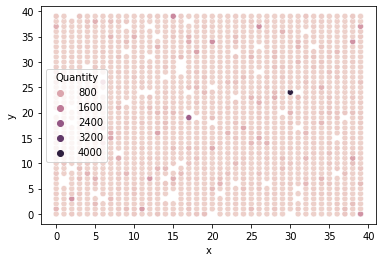

In [140]:
sns.scatterplot(data=wh_random, x='x', y='y', hue='Quantity')

<AxesSubplot:xlabel='x', ylabel='y'>

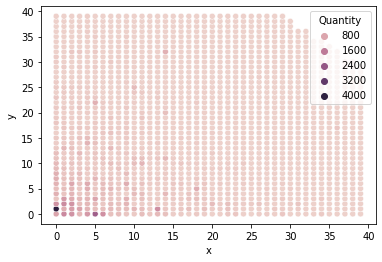

In [141]:
sns.scatterplot(data=wh_support, x='x', y='y', hue='Quantity')

<AxesSubplot:xlabel='x', ylabel='y'>

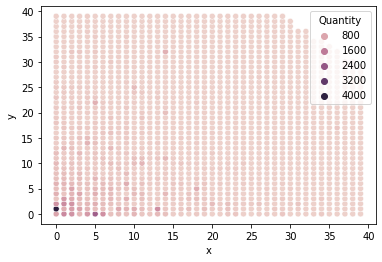

In [142]:
sns.scatterplot(data=wh_basket, x='x', y='y', hue='Quantity')